In [7]:
#Importing required libraries

import warnings
import itertools 
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math
from io import StringIO
import requests
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.utils import check_array

In [8]:
df = pd.read_csv('original_data.csv')
df_ser = pd.read_csv('serial.csv')
df.dropna(axis=1,inplace=True)
dates = pd.date_range(start='2010-01-01', freq='MS', periods=len(df))

#joining data frames to form a combined data frame called: combined
combined=pd.merge(df,df_ser, on= 'Date')
d = combined.drop(columns=['Date'])
print('Data with months(Jan-10 to June-15) replaced by integral values (1 to 66)')
print(d)



Data with months(Jan-10 to June-15) replaced by integral values (1 to 66)
    Quantity  Serial
0     218.38       1
1     187.07       2
2     201.23       3
3     219.55       4
4     214.70       5
5     193.13       6
6     229.12       7
7     151.00       8
8     220.37       9
9     236.03      10
10    223.53      11
11    238.29      12
12    212.74      13
13     92.04      14
14     91.48      15
15     92.50      16
16    129.81      17
17    124.00      18
18    135.48      19
19     84.23      20
20    184.70      21
21    255.58      22
22    177.13      23
23    186.77      24
24    247.23      25
25    202.38      26
26    244.22      27
27    270.53      28
28    275.51      29
29    311.42      30
..       ...     ...
36    225.45      37
37    213.29      38
38    179.56      39
39    173.78      40
40    165.25      41
41    147.53      42
42    196.38      43
43    111.38      44
44    179.04      45
45    187.20      46
46    223.53      47
47    214.45      48
48

In [ ]:
#Linear Model for 5.5 years of Data

Regression Coefficients:
(0.36512430852729366, 203.24014918414915)


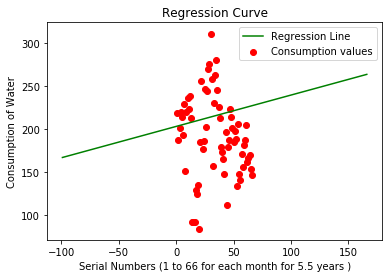

In [9]:
#Extracting values of columns into different DataFrames for X and Y coordinates
X = d['Serial'].values #Serail Numbers
Y = d['Quantity'].values #Consumption values

#Mean values
mean_X = np.mean(X)
mean_Y = np.mean(Y)

#Number of Records
m= len(X)

#Numerator and Denominators to calculate Regression Coefficients
num=0
den=0

for i in range(m):
    num += (X[i] - mean_X) * (Y[i] - mean_Y)
    den += (X[i] - mean_X) ** 2
    
#Calculating Regression Coefficients
B1 = num / den
B0 = mean_Y - (B1 * mean_X)
#Getting absolute Regressive Coefficient values B_1,
B_1=abs(B1)
B_0=abs(B0)
print('Regression Coefficients:')
print(B_1,B_0)


#Plotting values and Regression Line
max_X = np.max(X)+100
min_X = np.min(X)-100

# Calculating line values a and b
a = np.linspace(min_X, max_X, 1000)
b = B_0 + B_1 * a


# Ploting Regression Line
plt.plot(a, b, color='g', label='Regression Line')

# Ploting Scatter Points
plt.scatter(X, Y, color='r', label='Consumption values')
plt.xlabel('Serial Numbers (1 to 66 for each month for 5.5 years )')
plt.ylabel('Consumption of Water')
plt.legend(loc='best')
plt.title('Regression Curve')
plt.show()



In [ ]:
#Linear Model based upon Predicted and Original values of last 6 months of Data

Regression Coefficients:
(1.9971428571428564, 322.48333333333335)


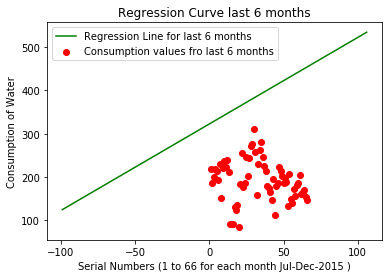

In [10]:
#Extracting values of columns into different DataFrames for X and Y coordinates
pred = pd.read_csv('org_data.csv')
test = pd.read_csv('test_data.csv')

Xx = pred['Serial'].values #Serail Numbers
Yy = pred['Quantity'].values #Consumption values

#Mean values
mean_Xx = np.mean(Xx)
mean_Yy = np.mean(Yy)

#Number of Records
m1 = len(Xx)

#Numerator and Denominators to calculate Regression Coefficients
num1=0
den1=0

for i in range(m1):
    num1 += (Xx[i] - mean_Xx) * (Yy[i] - mean_Yy)
    den1 += (Xx[i] - mean_Xx) ** 2
    
#Calculating Regression Coefficients
b1 = num1 / den1
b0 = mean_Yy - (b1 * mean_Xx)
#Getting absolute Regressive Coefficient values B_1,
b_1=abs(b1)
b_0=abs(b0)
print('Regression Coefficients:')
print(b_1,b_0)



#Plotting values and Regression Line
max_Xx = np.max(Xx)+100
min_Xx = np.min(Xx)-100

# Calculating line values a and b
a1 = np.linspace(min_Xx, max_Xx, 1000)
b1 = b_0 + b_1 * a1


# Ploting Regression Line
plt.plot(a1, b1, color='g', label='Regression Line for last 6 months')

# Ploting Scatter Points
plt.scatter(X, Y, color='r', label='Consumption values fro last 6 months')
plt.xlabel('Serial Numbers (1 to 66 for each month Jul-Dec-2015 )')
plt.ylabel('Consumption of Water')
plt.legend(loc='best')
plt.title('Regression Curve last 6 months')
plt.show()



In [11]:
#Predicted Values

#Fitting created Linear model using test data

lm=LinearRegression()
lm.fit(pred,test,sample_weight=None)
print('Predicted Values:')
print(lm.predict(pred))

Predicted Values:
[[  1.         337.88371615]
 [  2.         223.71703647]
 [  3.         367.41718044]
 [  4.         386.02949754]
 [  5.         331.98273697]
 [  6.         127.76983243]]


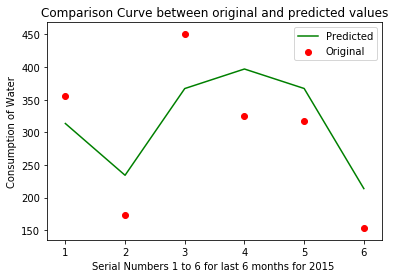

In [12]:
x1= test['Quantity'].values
y1= test['Serial'].values
x2= pred['Quantity'].values
y2= pred['Serial'].values

#Comparison plot for last 6 months Jul'15 to Dec'15
plt.plot(y2,x2, color='g', label='Predicted')
plt.scatter(y1, x1, color='r', label='Original')
plt.xlabel('Serial Numbers 1 to 6 for last 6 months for 2015 ')
plt.ylabel('Consumption of Water')
plt.legend(loc='best')
plt.title('Comparison Curve between original and predicted values')
plt.show()

In [15]:
#Calculating RMSE values for this Linear Model
rmse = 0
er = test-pred
abs(er)
mse = mean_squared_error(test, pred)
rmse = sqrt(mse)/100
print('RMSE value calculated for this Linear Model is:')
print('RMSE: %f' % rmse)





RMSE value calculated for this Linear Model is:
RMSE: 0.445415


In [14]:
#Calculating MAPE value for this Linear Model

org = test
pre = pred

q=check_array(org,pred)
soln = np.mean(np.abs((org - pre) / org)) * 100 #has MAPE value
print('MAPE value calculated for this Linear Model is:') 
print(soln['Quantity'])

MAPE value calculated for this Linear Model is:
23.81666421847766


In [ ]:
#END